In [1777]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text


# Alzheimer

In [1778]:
ae_classif = pd.read_excel('bernn_metrics.xlsx', sheet_name='alzheimer classif values', index_col='model')
ae_metrics = pd.read_excel('bernn_metrics.xlsx', sheet_name='alzheimer metrics values', index_col='model name')
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'Batch entropy'] = [(np.log(21) - x)/np.log(21) for x in ae_metrics.loc[:, 'Batch entropy']]
ae_metrics.loc[:, 'qc aPCC'] = [[1 - xx for xx in x] for x in ae_metrics.loc[:, 'qc aPCC']]
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


ae_classif['model'] = ae_classif.index
ae_metrics['model'] = ae_metrics.index
model_names = ae_classif['model'].tolist()


/tmp/ipykernel_3736795/1604177182.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
/tmp/ipykernel_3736795/1604177182.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [1779]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE":ae_metrics['Batch entropy'],
    "models": ae_metrics['model']
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model']
})
df_qc = pd.DataFrame({
    "qc_dist": ae_metrics['QC dist / total dist'],
    "models": ae_metrics['model']
})
df_apcc = pd.DataFrame({
    "qc_aPCC": ae_metrics['qc aPCC'],
    "models": ae_metrics['model'],
})

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        # np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        # np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        # np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models'])

df_qc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_qc.iloc[i]['qc_dist']).reshape([-1, 1]), 
        np.array([df_qc.iloc[i]['models']] * len(df_qc.iloc[i]['qc_dist'])).reshape([-1, 1]),
        # np.array([['qc_dist'] * len(df_qc.iloc[i]['qc_dist'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_qc.shape[0])
]), columns=['value', 'models'])

df_apcc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_apcc.iloc[i]['qc_aPCC']).reshape([-1, 1]), 
        np.array([df_apcc.iloc[i]['models']] * len(df_apcc.iloc[i]['qc_aPCC'])).reshape([-1, 1]),
        #np.array([['qc_aPCC'] * len(df_apcc.iloc[i]['qc_aPCC'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_apcc.shape[0])
]), columns=['value', 'models'])


# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    # "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    # "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    # "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['models']))]

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]

df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]
df_qc.loc[:, 'value'] = [float(x) for x in df_qc.loc[:, 'value']]
df_apcc.loc[:, 'value'] = [float(x) for x in df_apcc.loc[:, 'value']]

lolims = [True for _ in range(len(df_be['value']))]



findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

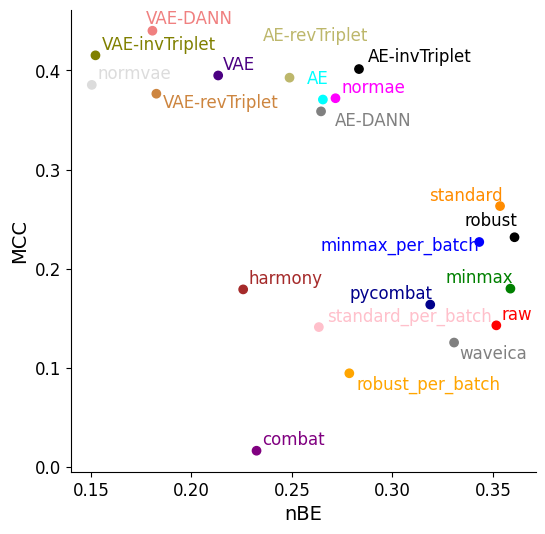

In [1780]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nBE', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_be.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'robust':
        y += 0.006
    #     x -= 0.006
    # elif txt == 'standard':
    #     y -= 0.004
    elif txt == 'AE-revTriplet':
        y += 0.03
        x -= 0.004
    elif txt == 'VAE-revTriplet':
        y -= 0.02
    elif txt == 'AE-invTriplet':
        y += 0.003
    elif txt == 'AE-DANN':
        y -= 0.02
        x += 0.004
    elif txt == 'AE':
        y += 0.01
        x -= 0.01
    elif txt == 'minmax_per_batch':
        y -= 0.015
    #     x -= 0.004
    # elif txt == 'AE':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'waveica':
    #     y -= 0.004
    #ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
    
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

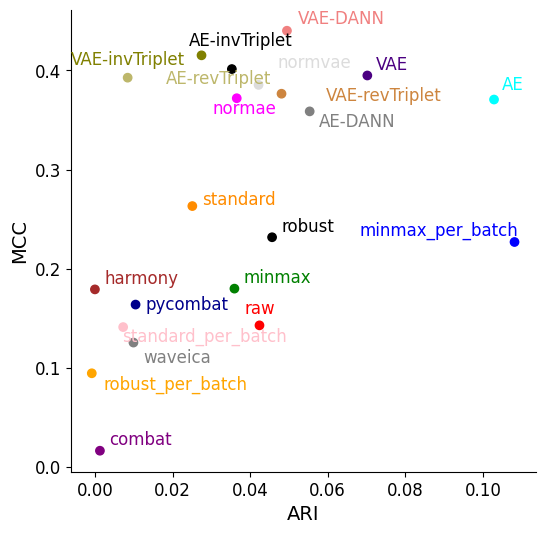

In [1781]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('ARI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    elif txt == 'standard':
        y -= 0.004
    elif txt == 'AE-revTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'VAE-invTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'AE':
        y += 0.004
        # x -= 0.004
    elif txt == 'waveica':
        y -= 0.004
    #ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
    
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

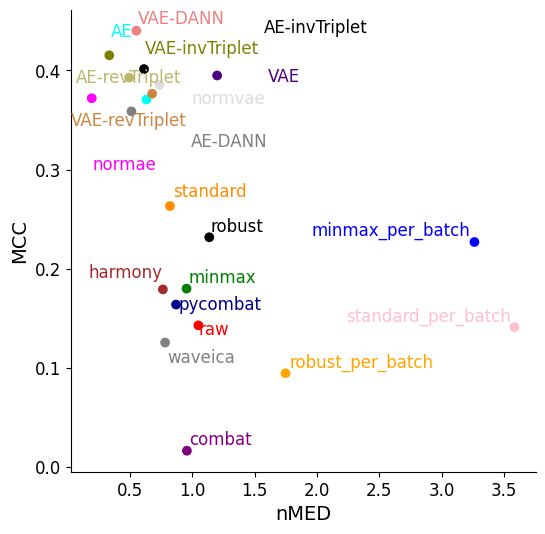

In [1782]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_qc.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nMED', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_qc.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'harmony':
        y += 0.006
        x -= 0.3
    if txt == 'AE-DANN':
        y -= 0.022
        x -= 0.006
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    if txt == 'normae':
        y -= 0.056
        x -= 0.006
    if txt == 'VAE-DANN':
        y += 0.006
        x -= 0.006
    elif txt == 'standard':
        y += 0.004
        x += 0.006
    elif txt == 'AE-revTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'VAE-invTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'AE':
        y += 0.04
        x -= 0.04
    elif txt == 'waveica':
        y -= 0.004
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
plt.show()


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

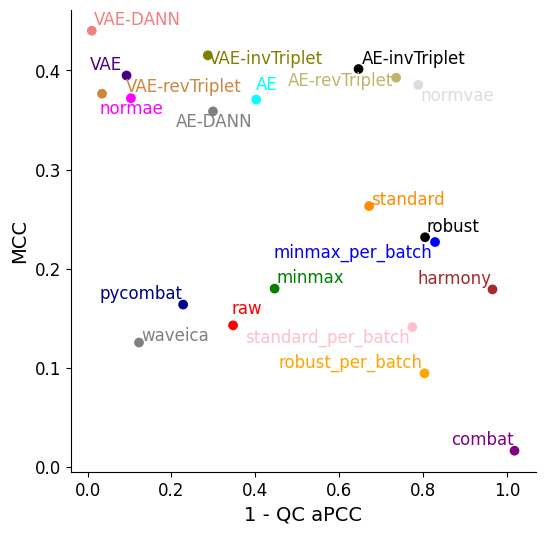

In [1783]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_apcc.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('1 - QC aPCC', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_apcc.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    elif txt == 'standard':
        y -= 0.004
    elif txt == 'AE-revTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'VAE-invTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'AE':
        y += 0.004
        x -= 0.004
    elif txt == 'waveica':
        y -= 0.004
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
plt.show()


In [1784]:
ae_metrics.drop(['model'], axis=1)
new_df = pd.concat((ae_classif.loc[:, 'valid/mcc'], ae_metrics.drop(['model'], axis=1)), axis=1)
# make apply to make all string arrays into arrays then mean

new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))
new_df.to_csv('../logs/table_alz_supp.csv')

/tmp/ipykernel_3736795/3900751193.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))


# Amide

In [1785]:
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='amide classif values', index_col='Unnamed: 0')
ae_metrics = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='amide metrics values', index_col='Unnamed: 0')
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'BE'] = [(np.log(3) - x)/np.log(3) for x in ae_metrics.loc[:, 'BE']]
ae_metrics.loc[:, 'qc_aPCC'] = [[1 - xx for xx in x] for x in ae_metrics.loc[:, 'qc_aPCC']]
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


ae_classif['model'] = ae_classif.index
ae_metrics['model'] = ae_metrics.index
model_names = ae_classif['model'].tolist()


/tmp/ipykernel_3736795/2463175491.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
/tmp/ipykernel_3736795/2463175491.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [1786]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE":ae_metrics['BE'],
    "models": ae_metrics['model']
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model']
})
df_qc = pd.DataFrame({
    "qc_dist": ae_metrics['qc_dist/total_dist'],
    "models": ae_metrics['model']
})
df_apcc = pd.DataFrame({
    "qc_aPCC": ae_metrics['qc_aPCC'],
    "models": ae_metrics['model'],
})

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        # np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        # np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        # np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models'])

df_qc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_qc.iloc[i]['qc_dist']).reshape([-1, 1]), 
        np.array([df_qc.iloc[i]['models']] * len(df_qc.iloc[i]['qc_dist'])).reshape([-1, 1]),
        # np.array([['qc_dist'] * len(df_qc.iloc[i]['qc_dist'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_qc.shape[0])
]), columns=['value', 'models'])

df_apcc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_apcc.iloc[i]['qc_aPCC']).reshape([-1, 1]), 
        np.array([df_apcc.iloc[i]['models']] * len(df_apcc.iloc[i]['qc_aPCC'])).reshape([-1, 1]),
        #np.array([['qc_aPCC'] * len(df_apcc.iloc[i]['qc_aPCC'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_apcc.shape[0])
]), columns=['value', 'models'])


# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    # "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    # "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    # "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['models']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        # np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        # np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        # np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]

df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]
df_qc.loc[:, 'value'] = [float(x) for x in df_qc.loc[:, 'value']]
df_apcc.loc[:, 'value'] = [float(x) for x in df_apcc.loc[:, 'value']]

lolims = [True for _ in range(len(df_be['value']))]



findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

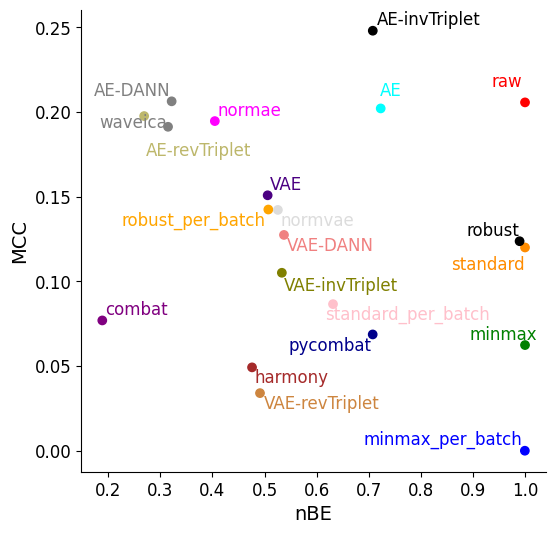

In [1787]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nBE', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_be.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    elif txt == 'standard':
        y -= 0.004
    elif txt == 'AE-revTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'VAE-invTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'AE':
        y += 0.004
        x -= 0.004
    elif txt == 'waveica':
        y -= 0.004
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
    
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

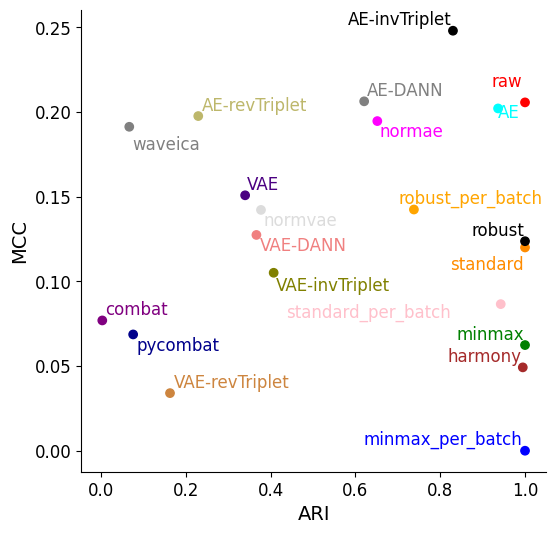

In [1788]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('ARI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    elif txt == 'standard':
        y -= 0.004
    # elif txt == 'AE-revTriplet':
    #     y -= 0.014
    ##    x -= 0.004
    elif txt == 'VAE-invTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'AE':
        y += 0.004
        x -= 0.004
    elif txt == 'waveica':
        y -= 0.004
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

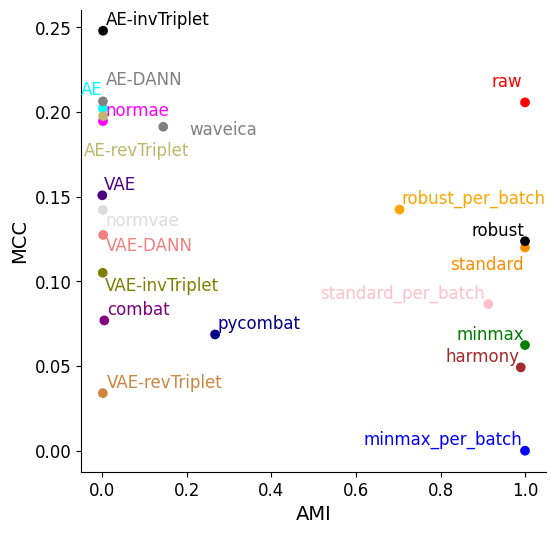

In [1789]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_ami.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('AMI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_ami.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    elif txt == 'standard':
        y -= 0.004
    elif txt == 'AE-revTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'VAE-invTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'AE':
        y += 0.004
        x -= 0.004
    elif txt == 'waveica':
        y -= 0.004
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

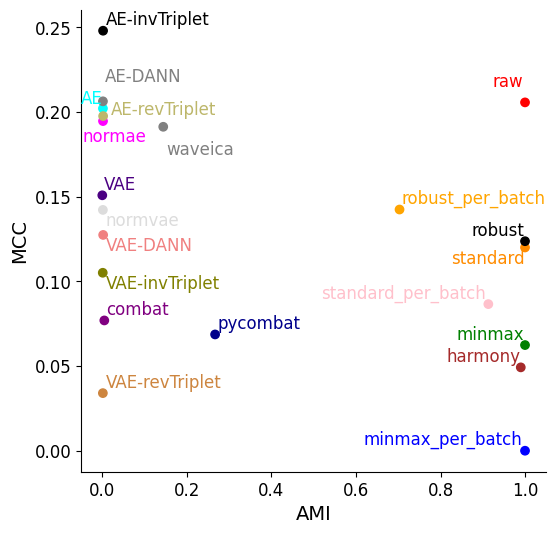

In [1790]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_ami.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('AMI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_ami.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    #elif txt == 'standard':
    #    y -= 0.004
    #elif txt == 'AE-revTriplet':
    #    y -= 0.014
    #    x -= 0.004
    #elif txt == 'VAE-invTriplet':
    #    y -= 0.014
    #    x -= 0.004
    #elif txt == 'AE':
    #    y += 0.004
    #    x -= 0.004
    #elif txt == 'waveica':
    #    y -= 0.004
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

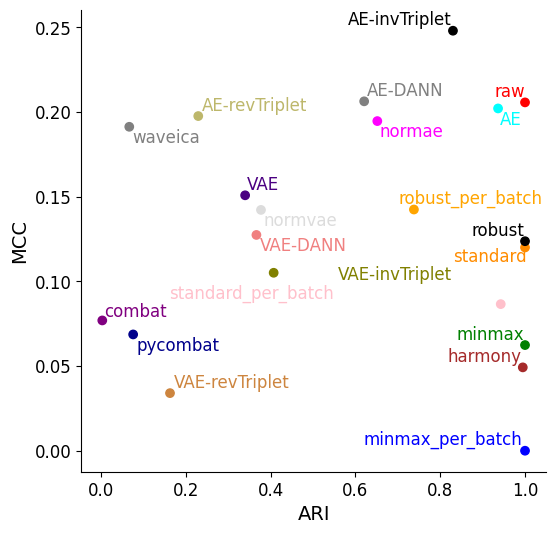

In [1791]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('ARI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    #if txt == 'raw':
    #    y += 0.006
    #    x -= 0.006
    #elif txt == 'standard':
    #    y -= 0.004
    #elif txt == 'AE-revTriplet':
    #    y -= 0.014
    #    x -= 0.004
    #elif txt == 'VAE-invTriplet':
    #    y -= 0.014
    #    x -= 0.004
    #elif txt == 'AE':
    #    y += 0.004
    #    x -= 0.004
    #elif txt == 'waveica':
    #    y -= 0.004
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
    
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

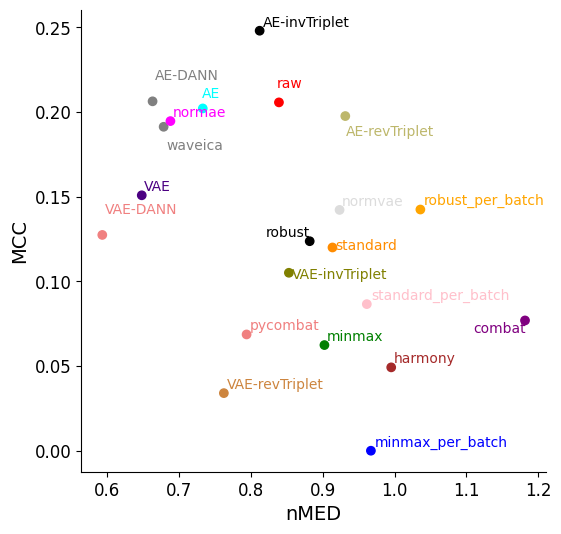

In [1792]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","lightcoral","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_qc.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nMED', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_qc.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    elif txt == 'standard':
        y -= 0.004
    elif txt == 'AE-revTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'VAE-invTriplet':
        y += 0.004
        # x -= 0.004
    elif txt == 'AE':
        y += 0.004
        x -= 0.004
    elif txt == 'waveica':
        y -= 0.006
    elif txt == 'AE-DANN':
        y += 0.01
    elif txt == 'VAE-DANN':
        y += 0.01

    #ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=10)]
adjust_text(texts)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

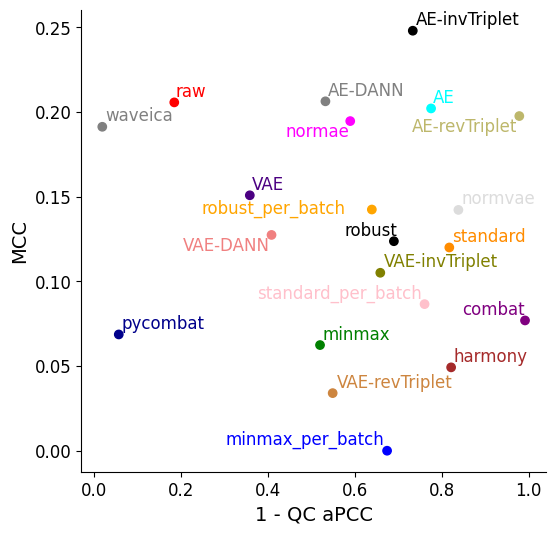

In [1793]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(df_apcc.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('1 - QC aPCC', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_apcc.groupby(['models'], sort=False).mean().iloc[i] + 0.002
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    #if txt == 'raw':
    #    y += 0.006
    #    x -= 0.006
    #elif txt == 'standard':
    #    y -= 0.004
    #    x += 0.002
    #elif txt == 'AE-revTriplet':
    #    y += 0.014
    #    x -= 0.004
    #elif txt == 'VAE-invTriplet':
    #    y -= 0.01
    #    x -= 0.004
    #elif txt == 'AE':
    #    y += 0.004
    #    x -= 0.004
    #elif txt == 'waveica':
    #    y -= 0.004
    #elif txt == 'AE-DANN':
    #    y += 0.004
    #elif txt == 'robust_per_batch':
    #    y += 0.01
    #elif txt == 'standard_per_batch':
    #    x += 0.005
    texts += [plt.text(float(x.iloc[0]), float(y.iloc[0]), txt, color=colors[i])]
adjust_text(texts)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
    
plt.show()

In [1794]:
ae_metrics.drop(['model'], axis=1)
new_df = pd.concat((ae_classif.loc[:, 'valid/mcc'], ae_metrics.drop(['model'], axis=1)), axis=1)
# make apply to make all string arrays into arrays then mean

new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))
new_df.to_csv('../logs/table_amide_supp.csv')

/tmp/ipykernel_3736795/1278274551.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))


# Mice

In [1795]:
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='mice classif values', index_col='Unnamed: 0')
ae_metrics = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='mice metrics values', index_col='Unnamed: 0')
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'BE'] = [(np.log(7) - x)/np.log(7) for x in ae_metrics.loc[:, 'BE']]
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


ae_classif['model'] = ae_classif.index
ae_metrics['model'] = ae_metrics.index
model_names = ae_classif['model'].tolist()


/tmp/ipykernel_3736795/57251626.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
/tmp/ipykernel_3736795/57251626.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [1796]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE": ae_metrics['BE'],
    "models": ae_metrics['model'],
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model']
})

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        # np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        # np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        # np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models'])


# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    # "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    # "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    # "group": ['test' for _ in range(len(ae_classif['model']))]
})


df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]

df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]




In [1797]:
df_ari

,value,models
0,0.78363,raw
1,0.809809,minmax
2,0.749553,minmax_per_batch
3,0.735547,standard
4,0.014476,standard_per_batch
...,...,...
56,0.0997,VAE-revTriplet
57,0.0908,VAE-revTriplet
58,0.0809,VAE-revTriplet
59,0.0603,VAE-revTriplet


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
/home/simonp/miniconda3/lib/python3.11/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/home/simonp/miniconda3/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
findfont: Font family 'normal' not found.
/home/simonp/miniconda3/

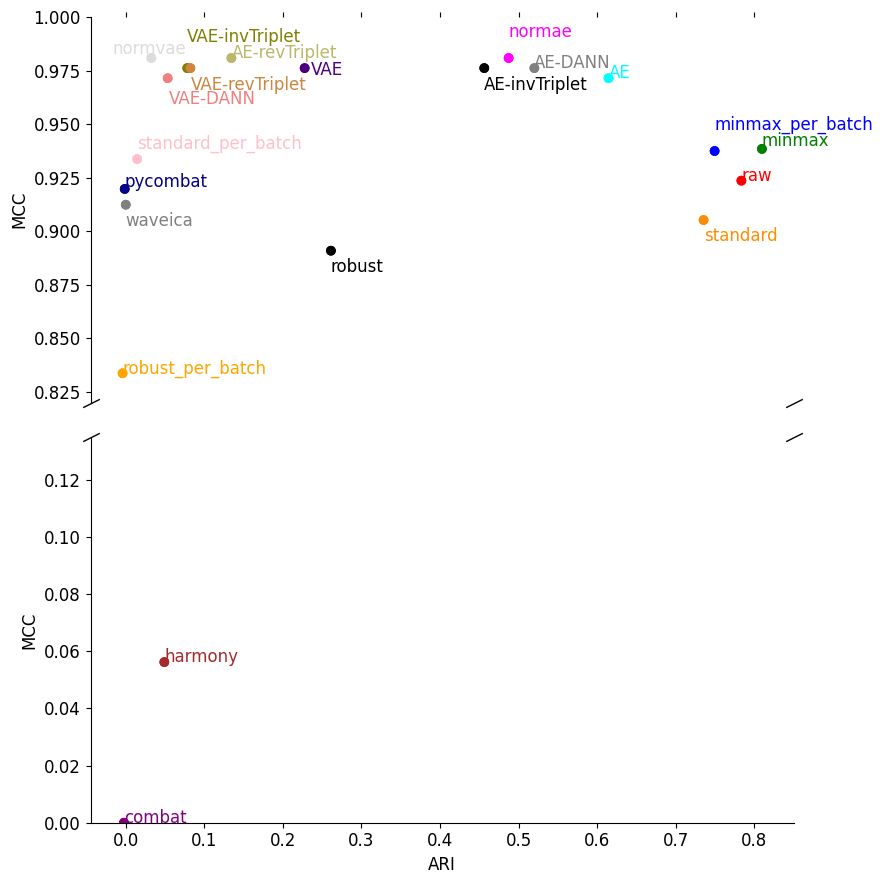

In [1842]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9,9))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax2.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.82, 1.)  # outliers only
ax2.set_ylim(0, .135)  # most of the data

ax1.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax1.set_ylabel('MCC')
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i]
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'normvae':
        y += 0.002
        x -= 0.05
    if txt == 'VAE':
        x += 0.008
        y -= 0.003
    if txt == 'raw':
        y -= 0.0
    if txt == 'minmax':
        y += 0.0015
    if txt == 'robust':
        y -= 0.01
    if txt == 'minmax_per_batch':
        y += 0.01
    if txt == 'waveica':
        y -= 0.01
    if txt == 'pycombat':
        y += 0.001
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y += 0.005
    if txt == 'normae':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.01
    if txt == 'VAE-DANN':
        y -= 0.012
        x += 0.002
    if txt == 'VAE-invTriplet':
        y += 0.012
    if txt == 'VAE-revTriplet':
        y -= 0.01
    ax1.annotate(txt, (x, y), color=colors[i])
ax2.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax2.set_xlabel('ARI')
ax2.set_ylabel('MCC')
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i]
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'VAE':
        y += 0.001
    if txt == 'raw':
        y -= 0.01
    if txt == 'minmax':
        y += 0.015
    if txt == 'robust':
        y += 0.01
    if txt == 'minmax_per_batch':
        y += 0.03
    if txt == 'waveica':
        y -= 0.01
    if txt == 'pycombat':
        y += 0.01
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y -= 0.005
    if txt == 'normae':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.01
    if txt == 'AE-revTriplet':
        y -= 0.02
    if txt == 'VAE-invTriplet':
        y += 0.012
    ax2.annotate(txt, (x, y), color=colors[i])
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.tight_layout()
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
/home/simonp/miniconda3/lib/python3.11/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/home/simonp/miniconda3/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
findfont: Font family 'normal' not found.
/home/simonp/miniconda3/

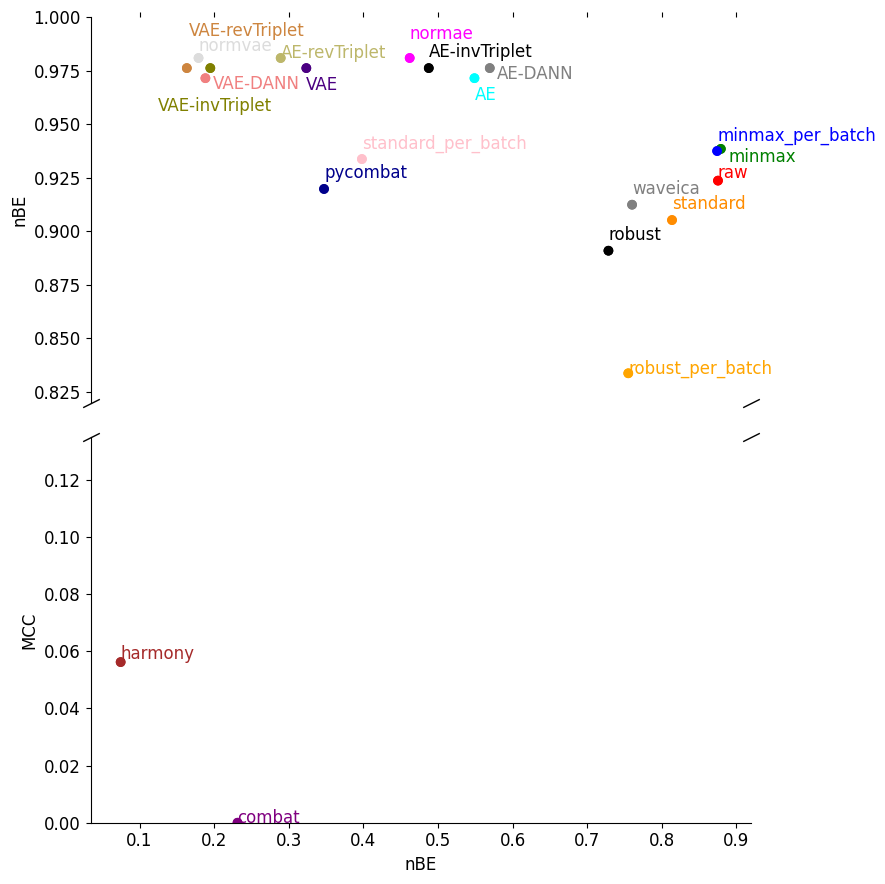

In [1825]:
from adjustText import adjust_text


N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","darkorange","pink","black","orange","purple","darkblue","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'olive', 'peru'])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9,9))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax2.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.82, 1.)  # outliers only
ax2.set_ylim(0, .135)  # most of the data

ax1.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax1.set_ylabel('nBE')
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_be.groupby(['models'], sort=False).mean().iloc[i]
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'normvae':
    #     y -= 0.015
    if txt == 'AE':
        y -= 0.01
    if txt == 'VAE':
        y -= 0.01
    if txt == 'raw':
        y += 0.001
    if txt == 'minmax':
        y -= 0.006
        x += 0.01
    if txt == 'robust':
        y += 0.005
    if txt == 'minmax_per_batch':
        y += 0.005
    if txt == 'waveica':
        y += 0.005
    if txt == 'pycombat':
        y += 0.005
    if txt == 'standard':
        y += 0.005
    if txt == 'standard_per_batch':
        y += 0.005
    if txt == 'normae':
        y += 0.009
    if txt == 'AE-invTriplet':
        y += 0.005
    if txt == 'AE-DANN':
        y -= 0.005
        x += 0.01
    if txt == 'VAE-DANN':
        y -= 0.005
        x += 0.01
    if txt == 'normvae':
        y += 0.0035
    if txt == 'VAE-invTriplet':
        y -= 0.02
        x -= 0.07
    if txt == 'VAE-revTriplet':
        y += 0.015
    if txt == 'VAE-revTriplet':
        x += 0.003

    ax1.annotate(txt, (x, y), color=colors[i])
    # print(x, y)
    #texts += [ax1.annotate(txt, (x, y), color=colors[i])]
    #texts += [ax1.text(float(x.iloc[0]), float(y.iloc[0]), txt)]

ax2.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax2.set_xlabel('nBE')
ax2.set_ylabel('MCC')
for i, txt in enumerate(ae_metrics['model']):
    x = df_be.groupby(['models'], sort=False).mean().iloc[i]
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'VAE':
    #     y += 0.001
    # if txt == 'raw':
    #     y -= 0.01
    # if txt == 'minmax':
    #     y += 0.015
    # if txt == 'robust':
    #     y -= 0.01
    # if txt == 'minmax_per_batch':
    #     y += 0.01
    # if txt == 'waveica':
    #     y -= 0.01
    # if txt == 'pycombat':
    #     y += 0.01
    # if txt == 'standard':
    #     y -= 0.01
    # if txt == 'standard_per_batch':
    #     y -= 0.01
    # if txt == 'normae':
    #     y += 0.01
    # if txt == 'AE-invTriplet':
    #     y -= 0.01
    if txt == 'pycombat':
        y += 0.001
    if txt == 'harmony':
        y += 0.001
    ax2.annotate(txt, (x, y), color=colors[i])
font = {'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

# hide the spines ar ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.tight_layout()
plt.show()

In [1800]:
ae_metrics.drop(['model'], axis=1)
new_df = pd.concat((ae_classif.loc[:, 'valid/mcc'], ae_metrics.drop(['model'], axis=1)), axis=1)
# make apply to make all string arrays into arrays then mean

new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))
new_df.to_csv('../logs/table_mice_supp.csv')

/tmp/ipykernel_3736795/3829140013.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))
